# Project Title: Sentiment Analysis on Twitter Data


*Introduction*

This project aims to build a Sentiment Analysis model that classifies tweets into Positive, Negative, or Neutral sentiments. This type of analysis is valuable for understanding public opinion, brand monitoring, and analyzing social media trends.


## **Step 1:** Importing Required Libraries
We begin by importing all necessary libraries including pandas, nltk, scikit-learn, and matplotlib. These libraries help with data loading, preprocessing, model building, and visualization.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Download NLTK resources
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Step 2:** Load and Explore the Dataset

In this step, we load the Twitter_Data.csv dataset and perform basic data exploration to understand the structure of the dataset and check for missing values.

In [ ]:
# Load dataset
df = pd.read_csv("/content/Twitter_Data.csv")

In [ ]:
# Display first few rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
# Check for null values and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
# Check the number of null values in each column
df.isnull().sum()

,0
clean_text,4
category,7


In [ ]:
# Drop all rows with any missing (null) values
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
# Check how many duplicate rows are in the Data
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [ ]:
# Basic stats
df['category'].value_counts()

,count
category,
1.0,72249
0.0,55211
-1.0,35509


## **Step 3:** Text Cleaning & Preprocessing

We clean the tweet texts by:

- Converting to lowercase

- Removing URLs, punctuation, and special characters

- Removing stopwords

- Applying stemming

This step is crucial for preparing the text for feature extraction and modeling.

In [ ]:
# Check column names
df.columns


Index(['clean_text', 'category'], dtype='object')

In [ ]:
# Define clean function
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    filtered = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return " ".join(filtered)

# Apply to all texts
df['cleaned_text'] = df['clean_text'].apply(preprocess)
df[['clean_text', 'cleaned_text']].head()


,clean_text,cleaned_text
0,when modi promised “minimum government maximum...,modi promis “minimum govern maximum governance...
1,talk all the nonsense and continue all the dra...,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,answer among power world leader today trump pu...



## **Step 4:** Visualize the Data

We use WordCloud to visualize the most frequent words in tweets of each sentiment category. This helps us gain a better understanding of the common themes in the text data.

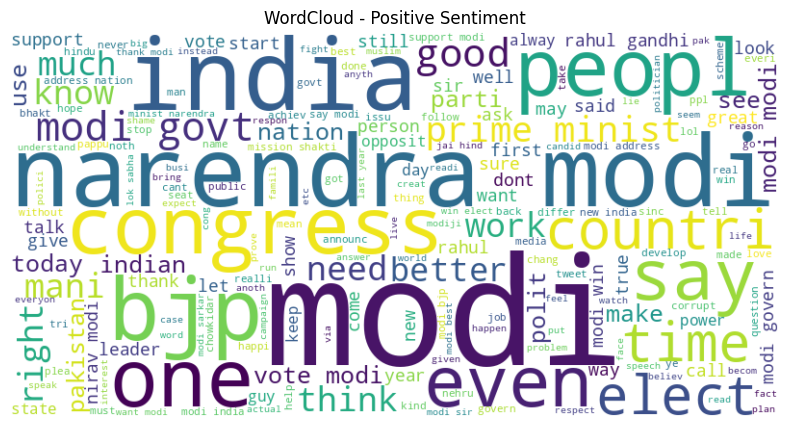

In [ ]:
# WordCloud for Positive Sentiment
positive_text = " ".join(df[df['category'] == 1.0]['cleaned_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Positive Sentiment")
plt.show()


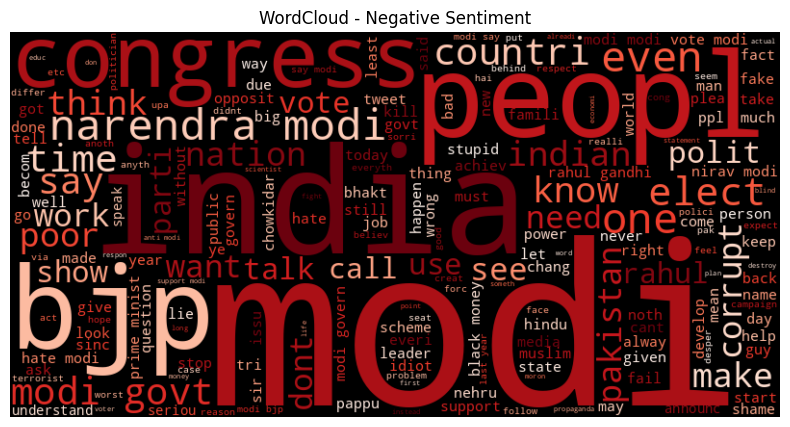

In [ ]:
# WordCloud for Negative Sentiment
negative_text = " ".join(df[df['category'] == -1.0]['cleaned_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Negative Sentiment")
plt.show()


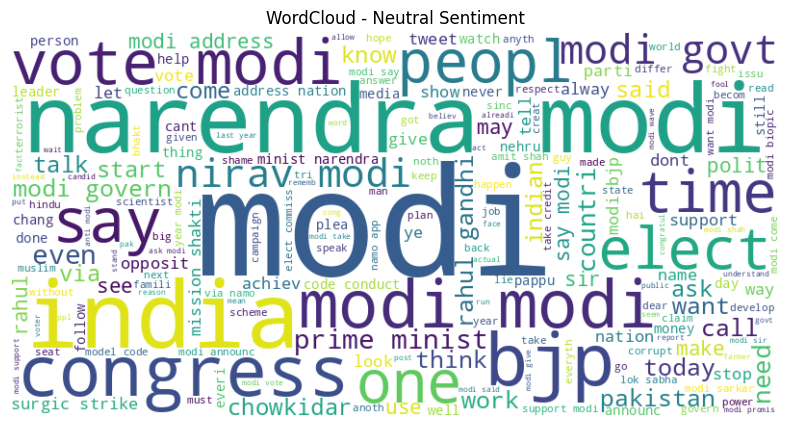

In [ ]:
# WordCloud for Neutral Sentiment
negative_text = " ".join(df[df['category'] == -0]['cleaned_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='White').generate(neutral_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Neutral Sentiment")
plt.show()


## **Step 5:** Feature Extraction

We use the Bag of Words technique with CountVectorizer to convert cleaned text into numerical features that can be used by machine learning models.

In [ ]:
# Bag-of-Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Labels
y = df['category']


## **Step 6:** Train-Test Split and Model Training

We use the Naive Bayes Classifier, a popular and effective model for text classification. The dataset is split into training and testing sets using an 80/20 ratio.



In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


## **Step 7:** Evaluate the Model

We evaluate the model using:

- Accuracy Score

- Classification Report (Precision, Recall, F1-Score)

- Confusion Matrix

These metrics help us understand how well our model is performing.



In [ ]:
# Accuracy and reports
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6981653064981285

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.69      0.58      0.63      7152
         0.0       0.80      0.56      0.66     11067
         1.0       0.66      0.86      0.74     14375

    accuracy                           0.70     32594
   macro avg       0.72      0.67      0.68     32594
weighted avg       0.71      0.70      0.69     32594



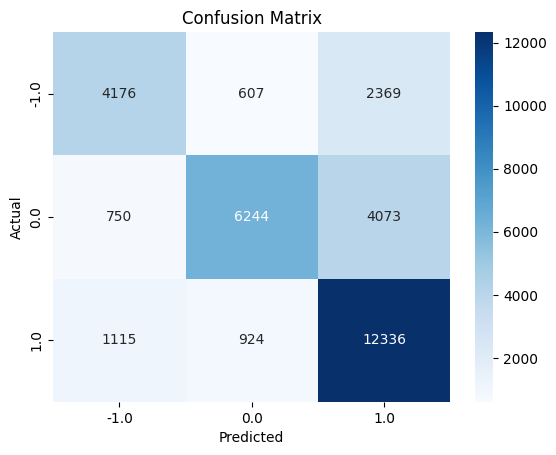

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ***Overall Insights***
* The model is strong in predicting Positive sentiments.

* The model confuses Neutral with Positive a lot.

* There’s some confusion between Negative and Positive, which needs improvement (likely due to imbalanced data or similar text patterns).






**This Sentiment Analysis project successfully demonstrated:**

- Text preprocessing and feature engineering

- Visualization of tweet data

- Model training using Naive Bayes

- Accurate prediction and evaluation of sentiments

This can be further enhanced using models like **Logistic Regression**, **SVM**, or **deep learning (LSTM, BERT)** for better accuracy.